# Experimenting

In [1]:
from single_preprocessing_function import single_preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [218]:
#import pre processed data using our previous built function
X, y, ticker, delay, lag = single_preprocessing(ticker='DXCM', delay=5, lag=0)

#We can confirm which ticker is configured by default by our function
print(ticker)

#dimentional check
if X.shape[0] > y.shape[0]:
    X = X[:-1]
else:
    print("Dimension check passsed")

DXCM
Dimension check passsed


c:\Users\kurom\Desktop\AI_GBC\S2\DL_I\Final_Project\single_preprocessing_function.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_y = [ y[i+delay+lag] for i in range(0, (y.shape[0]-(delay+lag)), delay)]


In [219]:
X.shape

(944, 5, 4)

In [220]:
y.shape

(944,)

## Before designing the RNN first let's split our data into a train/test split

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [222]:
X_train.shape

(604, 5, 4)

In [223]:
X_test.shape

(189, 5, 4)

In [224]:
X_val.shape

(151, 5, 4)

### Making a baseline

In [225]:
#Build a baseline ANN densely connected so that we can compare how LSTM y is better

In [226]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(delay, X_train.shape[-1])))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(X_train, y_train, steps_per_epoch=150, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
150/150 [==============================] - 2s 5ms/step - loss: 28.5533 - val_loss: 31.9400
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 29.5770 - val_loss: 30.8244
Epoch 3/20
150/150 [==============================] - 0s 3ms/step - loss: 27.6026 - val_loss: 29.4360
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 25.7595 - val_loss: 27.8269
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 24.8771 - val_loss: 26.0995
Epoch 6/20
150/150 [==============================] - 0s 3ms/step - loss: 22.3083 - val_loss: 24.4014
Epoch 7/20
150/150 [==============================] - 0s 3ms/step - loss: 22.1621 - val_loss: 22.6871
Epoch 8/20
150/150 [==============================] - 0s 2ms/step - loss: 20.0848 - val_loss: 20.9300
Epoch 9/20
150/150 [==============================] - 0s 3ms/step - loss: 18.6916 - val_loss: 19.0422
Epoch 10/20
150/150 [==============================] - 0s 2ms/step - loss: 16.6598

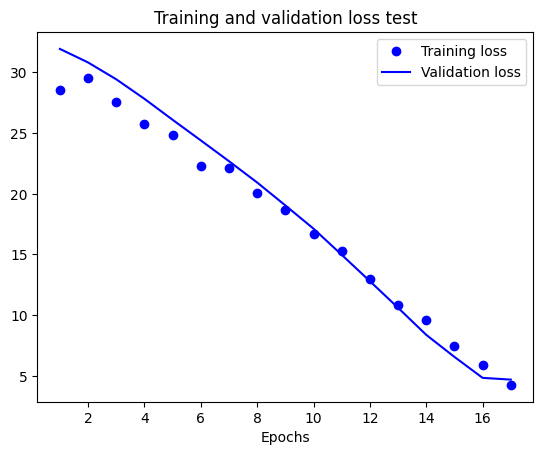

In [235]:

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.title('Training and validation loss ')
plt.legend()
plt.show()

In [228]:
predicted_stock_price = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


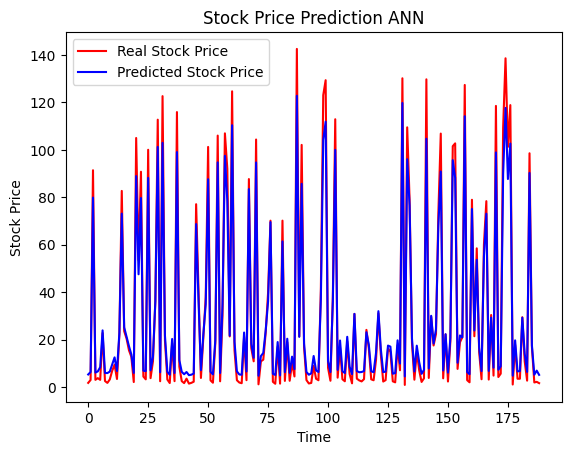

In [229]:
predicted_stock_price = model.predict(X_test)
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction ANN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [230]:
#Evaluate regression model using mse
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_stock_price)

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predicted_stock_price)

46.98860667327816

In [231]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predicted_stock_price)

0.7010248594951456

## LSTM

In [1]:
#So we can see that a normal ANN does not make a good job at predicting the closure price of stocks at several lags, some of the tickers are good at predicting 
#small delays and some others are good at predicting long delays, conclusions about this information will be further discussed in ppt and report

from single_preprocessing_function import single_preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [212]:
#import pre processed data using our previous built function
X, y, ticker, delay, lag = single_preprocessing(ticker='DXCM', delay=5, lag=0)

#We can confirm which ticker is configured by default by our function
print(ticker)

#dimentional check
if X.shape[0] > y.shape[0]:
    X = X[:-1]
else:
    print("Dimension check passsed")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

DXCM
Dimension check passsed
(604, 5, 4)
(604,)


c:\Users\kurom\Desktop\AI_GBC\S2\DL_I\Final_Project\single_preprocessing_function.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_y = [ y[i+delay+lag] for i in range(0, (y.shape[0]-(delay+lag)), delay)]


In [213]:
from keras import layers
from keras import optimizers
from keras.layers import Dropout
from keras.models import Sequential


lstm_model = Sequential()
lstm_model.add(layers.LSTM(units=70, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation="tanh" )) #add first layer for lstm
lstm_model.add(Dropout(0.2))
lstm_model.add(layers.LSTM(units=70, return_sequences=False, activation="tanh") ) #add second lstm layer
lstm_model.add(Dropout(0.2))
lstm_model.add(layers.Dense(1)) #don't add activation function because we are doing regression


optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False)
lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')
lstm_history = lstm_model.fit(X_train, y_train, epochs=190, batch_size=30, validation_data=(X_val, y_val))

Epoch 1/190
21/21 [==============================] - 13s 68ms/step - loss: 2423.7290 - val_loss: 2425.2012
Epoch 2/190
21/21 [==============================] - 0s 10ms/step - loss: 1896.6857 - val_loss: 1646.3929
Epoch 3/190
21/21 [==============================] - 0s 10ms/step - loss: 1105.2124 - val_loss: 676.5599
Epoch 4/190
21/21 [==============================] - 0s 10ms/step - loss: 421.6877 - val_loss: 307.2860
Epoch 5/190
21/21 [==============================] - 0s 14ms/step - loss: 210.0049 - val_loss: 176.5057
Epoch 6/190
21/21 [==============================] - 1s 25ms/step - loss: 128.2955 - val_loss: 118.2107
Epoch 7/190
21/21 [==============================] - 0s 11ms/step - loss: 96.4627 - val_loss: 119.3634
Epoch 8/190
21/21 [==============================] - 0s 14ms/step - loss: 89.1606 - val_loss: 80.2852
Epoch 9/190
21/21 [==============================] - 0s 12ms/step - loss: 73.0134 - val_loss: 83.5651
Epoch 10/190
21/21 [==============================] - 0s 10ms/s

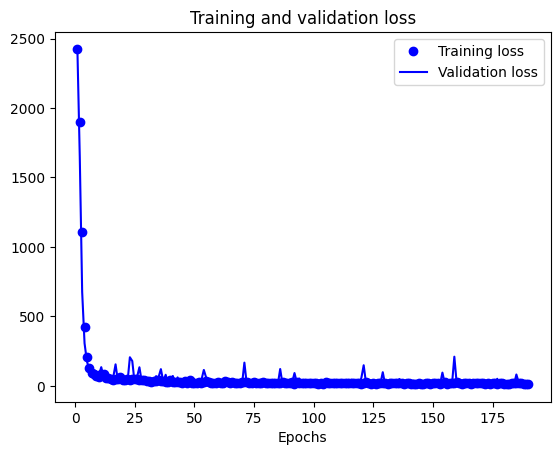

In [214]:
import matplotlib.pyplot as plt
loss = lstm_history.history['loss']
val_loss = lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.title('Training and validation loss')
plt.legend()
plt.show()

6/6 [==============================] - 1s 6ms/step


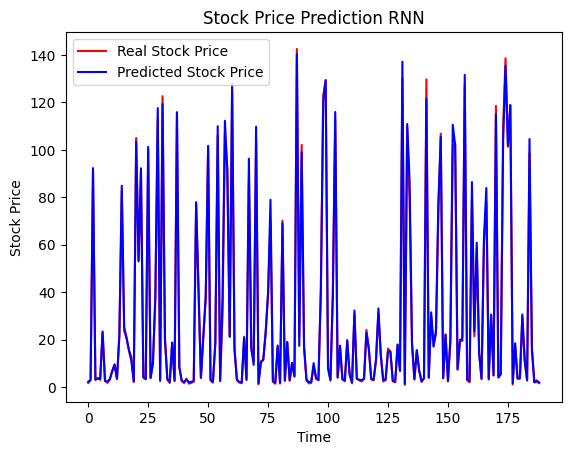

In [215]:
predicted_stock_price = lstm_model.predict(X_test)

plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [216]:
#Evaluate regression model using mse
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_stock_price)

4.899292385150447

In [217]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predicted_stock_price)

0.08285228124486926

# Summarazing

### Baseline function

In [9]:
import keras
keras.utils.set_random_seed(97)
#good can be better 18, 97

In [10]:
#Finally let's generate two functions that encapsulate everything we have done in this notebook
#Baseline function

from single_preprocessing_function import single_preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import numpy as np

def single_ticker_baseline_regression(ticker='DXCM', delay=5, lag=0):
    #get pre processed data using our previous built function
    X, y, ticker, delay, lag = single_preprocessing(ticker=ticker, delay=delay, lag=lag)

    #Confirm selected ticker
    print("Executing baseline ANN for selected ticker :",ticker)
    print("\n")
    print("delay :",delay," lag :",lag)
    print("\n")

    #dimentional check
    if X.shape[0] > y.shape[0]:
        X = X[:-1]
        print("Dimentional adjustment for X performed")
    else:
        print("Dimension check passsed")

    #Confirm shapes of X and y
    print("\n")
    print("Shape of X :")
    print(X.shape)
    print("\n")
    print("Shape of y :")
    print(y.shape)
    print("\n")

    if X.shape[0] == y.shape[0]:
        print("2nd Dimension check passed")
    else:
        assert X.shape[0] == y.shape[0], "The number of observations for X and y should be the same"
    print("\n")
    #Split data into test, validation, train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    #Simple ANN architechture
    model = Sequential()
    model.add(layers.Flatten(input_shape=(delay, X_train.shape[-1])))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(1))

    #Compile model and fit
    model.compile(optimizer=RMSprop(), loss='mae')
    history = model.fit(X_train, y_train, steps_per_epoch=150, epochs=20, validation_data=(X_val, y_val))

    #Plot training and validation loss
    print("\n")
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.title('Training and validation loss '+ticker)
    plt.legend()
    plt.show()

    #Make predictions and plot with correct values
    print("\n")
    predicted_stock_price = model.predict(X_test)
    plt.plot(y_test, color='red', label='Real Stock Price')
    plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
    plt.title('Stock Price Prediction ANN '+ticker)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    #Evaluate model
    #Evaluate regression model using mse and map
    print("MSE for model: ")
    print(mean_squared_error(y_test, predicted_stock_price))
    print("\n")
    print("MAPE for model: ")
    print(mean_absolute_percentage_error(y_test, predicted_stock_price))



### LSTM function

In [60]:
from single_preprocessing_function import single_preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras import optimizers
from keras.layers import Dropout

import matplotlib.pyplot as plt
import numpy as np

def single_ticker_LSTM_regression(ticker='DXCM', delay=5, lag=0):
    #get pre processed data using our previous built function
    X, y, ticker, delay, lag = single_preprocessing(ticker=ticker, delay=delay, lag=lag)

    #Confirm selected ticker
    print("Executing RNN-LSTM for selected ticker :",ticker)
    print("\n")
    print("delay :",delay," lag :",lag)
    print("\n")

    #dimentional check
    if X.shape[0] > y.shape[0]:
        X = X[:-1]
        print("Dimentional adjustment for X performed")
    else:
        print("Dimension check passsed")

    #Confirm shapes of X and y
    print("\n")
    print("Shape of X :")
    print(X.shape)
    print("\n")
    print("Shape of y :")
    print(y.shape)
    print("\n")

    if X.shape[0] == y.shape[0]:
        print("2nd Dimension check passed")
    else:
        assert X.shape[0] == y.shape[0], "The number of observations for X and y should be the same"
    print("\n")
    #Split data into test, validation, train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    #RNN-LSTM architechture
    lstm_model = Sequential()
    lstm_model.add(layers.LSTM(units=70, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation="tanh" )) #add first layer for lstm
    lstm_model.add(Dropout(0.2))
    lstm_model.add(layers.LSTM(units=70, return_sequences=False, activation="tanh") ) #add second lstm layer
    lstm_model.add(Dropout(0.2))
    lstm_model.add(layers.Dense(1)) #don't add activation function because we are doing regression

    #Compile model and fit
    optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False)
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')
    lstm_history = lstm_model.fit(X_train, y_train, epochs=190, batch_size=30, validation_data=(X_val, y_val))

    #Plot training and validation loss
    loss = lstm_history.history['loss']
    val_loss = lstm_history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.title('Training and validation loss '+ticker)
    plt.legend()
    plt.show()

    #Make predictions and plot with correct values
    predicted_stock_price = lstm_model.predict(X_test)
    plt.plot(y_test, color='red', label='Real Stock Price')
    plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
    plt.title('Stock Price Prediction RNN '+ticker)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    #Evaluate model
    #Evaluate regression model using mse and map
    print("MSE for model: ")
    print(mean_squared_error(y_test, predicted_stock_price))
    print("\n")
    print("MAPE for model: ")
    print(mean_absolute_percentage_error(y_test, predicted_stock_price))
    return lstm_model

c:\Users\kurom\Desktop\AI_GBC\S2\DL_I\Final_Project\single_preprocessing_function.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_y = [ y[i+delay+lag] for i in range(0, (y.shape[0]-(delay+lag)), delay)]


Executing RNN-LSTM for selected ticker : DXCM


delay : 15  lag : 10


Dimension check passsed


Shape of X :
(314, 15, 4)


Shape of y :
(314,)


2nd Dimension check passed


Epoch 1/190
7/7 [==============================] - 5s 231ms/step - loss: 2581.9434 - val_loss: 2995.0994
Epoch 2/190
7/7 [==============================] - 0s 30ms/step - loss: 2296.0552 - val_loss: 2536.8191
Epoch 3/190
7/7 [==============================] - 0s 27ms/step - loss: 1872.2103 - val_loss: 2127.6150
Epoch 4/190
7/7 [==============================] - 0s 29ms/step - loss: 1572.3588 - val_loss: 1947.7172
Epoch 5/190
7/7 [==============================] - 0s 29ms/step - loss: 1403.5358 - val_loss: 1348.6232
Epoch 6/190
7/7 [==============================] - 0s 25ms/step - loss: 888.6605 - val_loss: 937.7789
Epoch 7/190
7/7 [==============================] - 0s 24ms/step - loss: 575.6782 - val_loss: 716.3633
Epoch 8/190
7/7 [==============================] - 0s 21ms/step - loss: 415.8331 - val_loss: 631.73

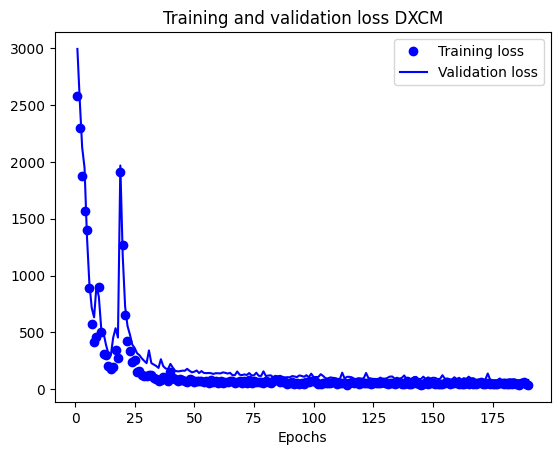

2/2 [==============================] - 1s 7ms/step


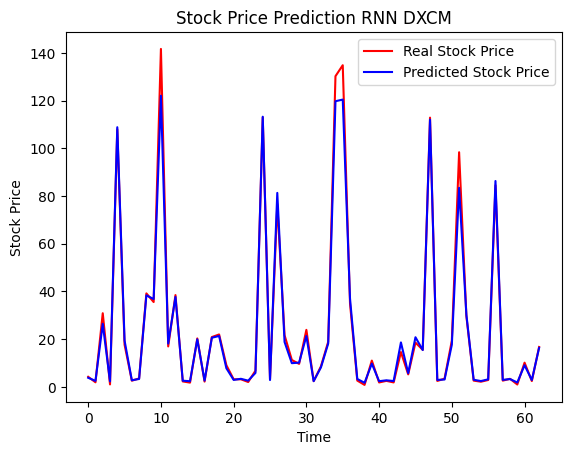

MSE for model: 
16.473940771192378


MAPE for model: 
0.1539579845281627


In [61]:
model = single_ticker_LSTM_regression(ticker='DXCM', delay=15, lag=10)

In [62]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 15, 70)            21000     
                                                                 
 dropout_48 (Dropout)        (None, 15, 70)            0         
                                                                 
 lstm_49 (LSTM)              (None, 70)                39480     
                                                                 
 dropout_49 (Dropout)        (None, 70)                0         
                                                                 
 dense_58 (Dense)            (None, 1)                 71        
                                                                 
Total params: 60551 (236.53 KB)
Trainable params: 60551 (236.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
